# Credit Risk Analysis 

In [1]:
import pandas as pd 
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams["figure.figsize"] = (13,7)

Data source: https://www.kaggle.com/datasets/laotse/credit-risk-dataset/

A brief description of the data:

- `person_age` $\rightarrow$  Age
- `person_income` $\rightarrow$ Annual Income
- `person_home_ownership` $\rightarrow$ Type of ownership of the individual
    - rent: The individual is currently renting a property.
    - mortgage: The individual has a mortgage on the property they own.
    - own: The individual owns their home outright.
    - other: Other categories of home ownership that may be specific to the dataset.
- `person_emp_length` $\rightarrow$ Employment length (in years)
- `loan_intent` $\rightarrow$ Loan intent
- `loan_grade` $\rightarrow$ Loan grade
    - A: The borrower has a high creditworthiness, indicating low risk.
    - B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
    - C: The borrower's creditworthiness is moderate.
    - D: The borrower is considered to have higher risk compared to previous grades.
    - E: The borrower's creditworthiness is lower, indicating a higher risk.
    - F: The borrower poses a significant credit risk.
    - G: The borrower's creditworthiness is the lowest, signifying the highest risk.
- `loan_amnt` $\rightarrow$ Loan amount
- `loan_int_rate` $\rightarrow$ Interest rate applied to the loan
- `loan_status` $\rightarrow$ Loan status (0 is non default 1 is default). This is our target variable.
- `loan_percent_income` $\rightarrow$ Percent income
- `cb_person_default_on_file` $\rightarrow$ Y is the person has a history of default
- `cb_preson_cred_hist_length` $\rightarrow$ Credit history length

In [2]:
cr_loan = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
cr_loan['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

So within our dataset, 7107 people have defaulted on the loan and 25467 haven't defaulted.

In [4]:
# let's take a look at the features
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
cr_loan['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

As we can see there is one variable, `cb_person_default_on_file` that takes only value Y/N, we can convert it into a binary variable 1/0.

In [6]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

# let's confront the two
print(lb.fit_transform(cr_loan['cb_person_default_on_file'])[:5]), print(cr_loan['cb_person_default_on_file'].head())


[[1]
 [0]
 [0]
 [0]
 [1]]
0    Y
1    N
2    N
3    N
4    Y
Name: cb_person_default_on_file, dtype: object


(None, None)

In [7]:
# The solution works, now we just need to substitute the new array in the column of the dataframe

cr_loan['cb_person_default_on_file'] = lb.fit_transform(cr_loan['cb_person_default_on_file'])
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4


## Exploratory Data Analysis

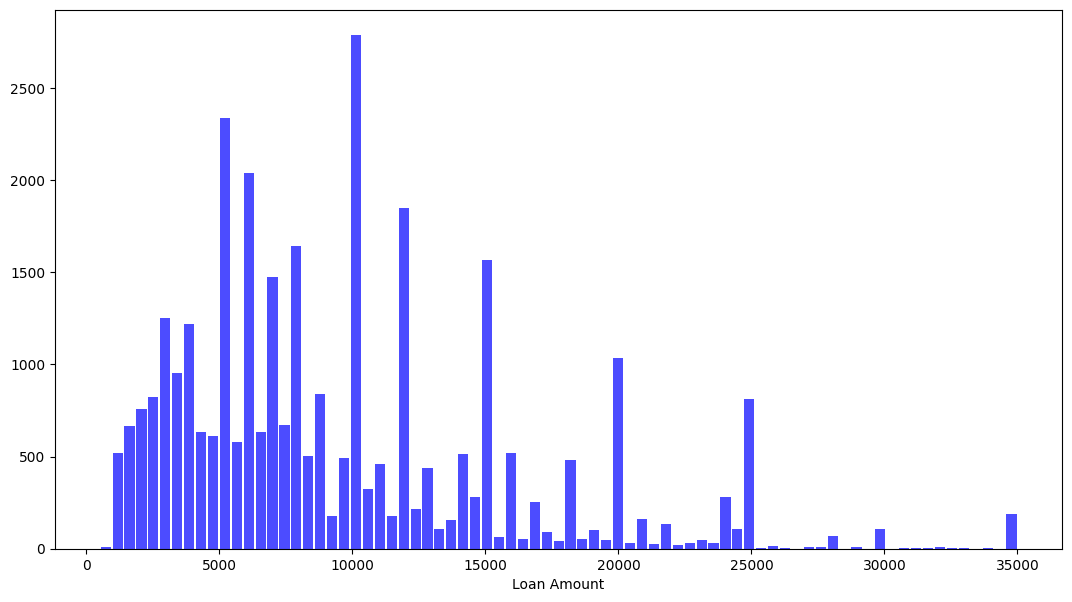

In [8]:
# Look at the distribution of loan amounts with a histogram
plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

In [9]:
# Create a cross table of the loan intent and loan status
pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [10]:
# Create a cross table of home ownership, loan status, and grade
pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']])

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [11]:
cr_loan['person_home_ownership'].value_counts() 

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [12]:
# Create a cross table of home ownership, loan status, and average percent income
pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


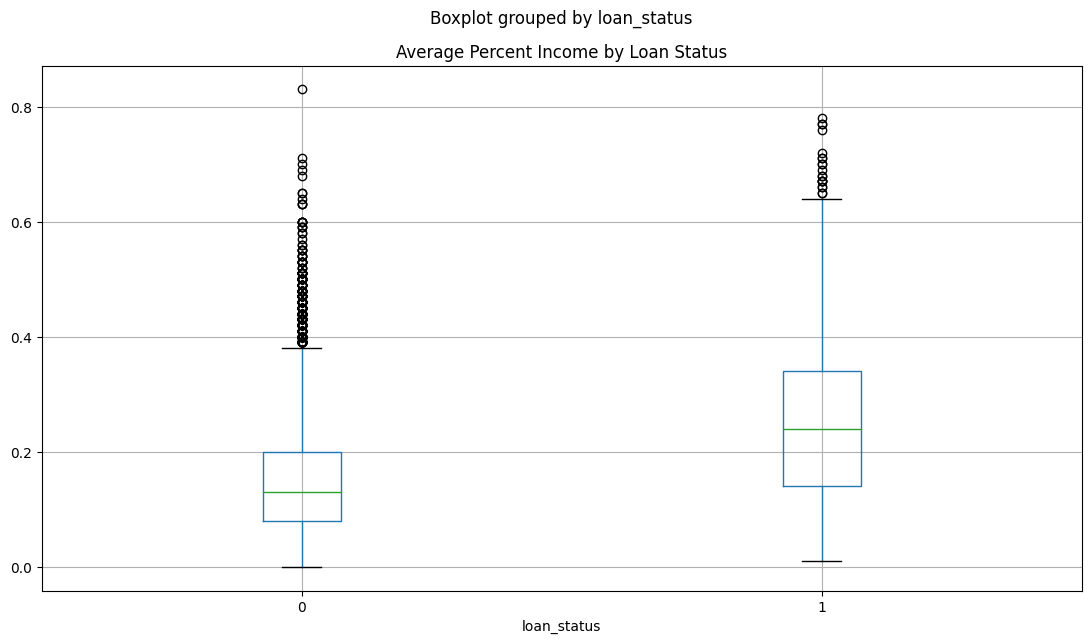

In [13]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.show()

It looks like the average percentage of income for defaults is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.

In [14]:
# Create a cross table of percent income, loan status, and average interest rate of the loan
# Percent income has been grouped into four equal bins

pd.crosstab(pd.qcut(cr_loan['loan_percent_income'], 5), cr_loan['loan_status'],values=cr_loan['loan_int_rate'], aggfunc = 'mean')

loan_status,0,1
loan_percent_income,,
"(-0.001, 0.08]",10.152607,13.425089
"(0.08, 0.12]",10.240102,13.782163
"(0.12, 0.18]",10.426418,13.760557
"(0.18, 0.25]",10.762556,13.653932
"(0.25, 0.83]",10.905944,12.375971


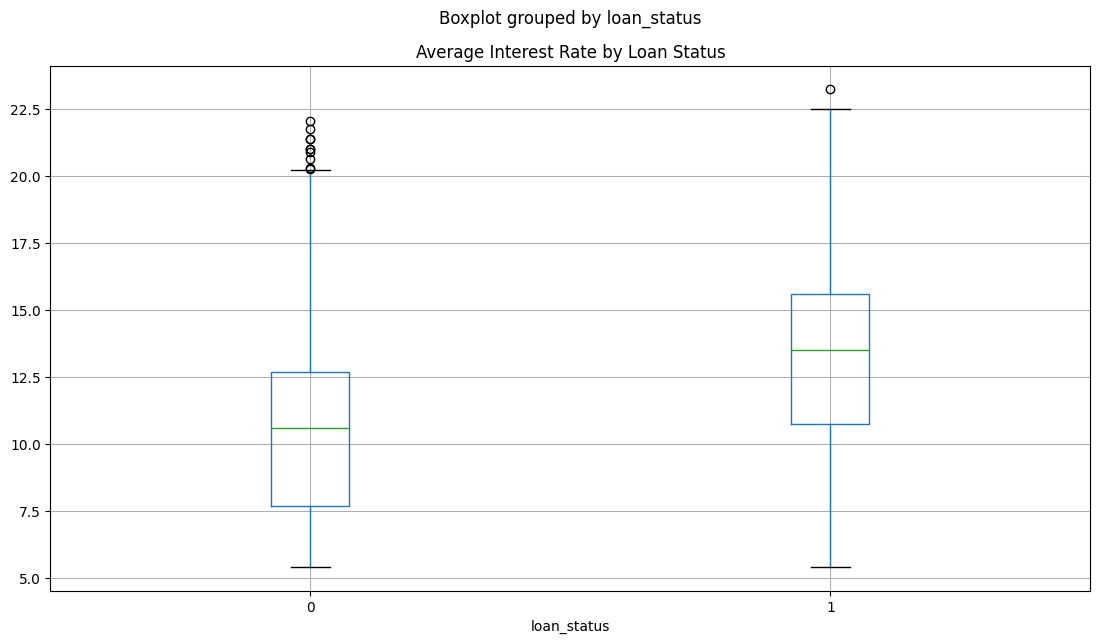

In [15]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_int_rate'], by = 'loan_status')
plt.title('Average Interest Rate by Loan Status')
plt.show()

In [16]:
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


<Axes: >

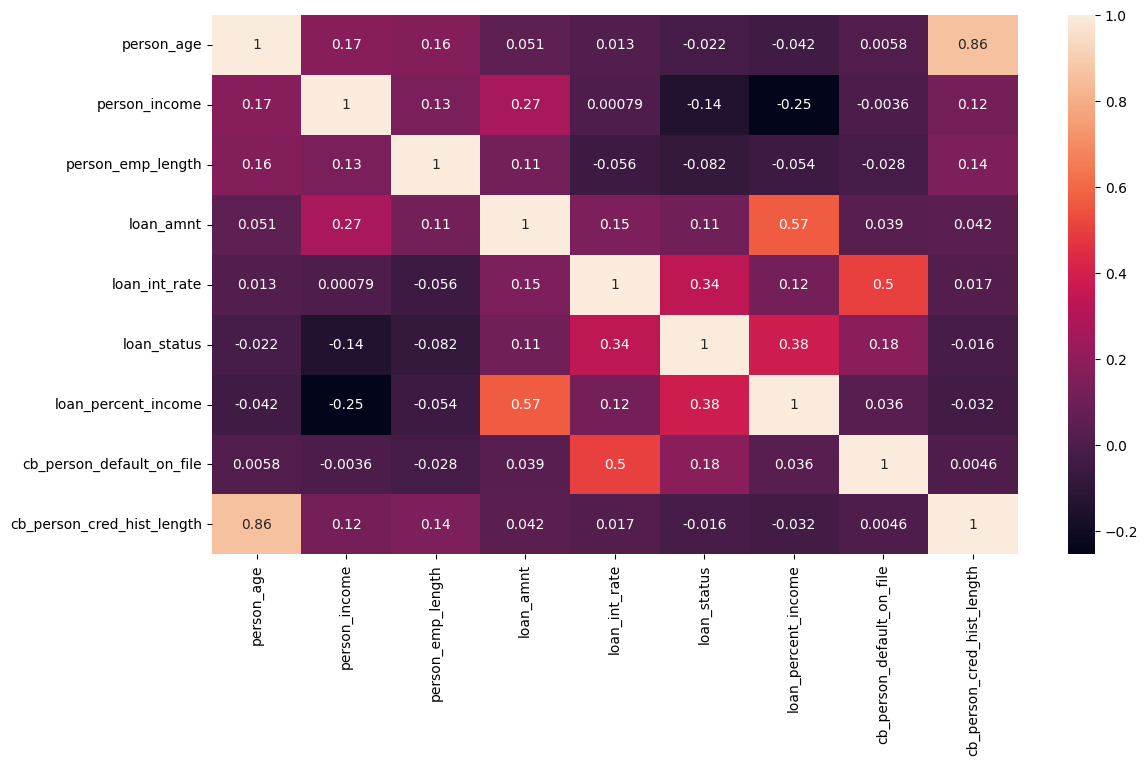

In [17]:
# Let's take a look of the correlations between the numerical features

sns.heatmap(cr_loan[['person_age', 'person_income', 'person_emp_length','loan_amnt','loan_int_rate','loan_status','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']].corr(), annot=True)

## Outliers

In [18]:
# We can use cross tables to find outliers, let's look at one for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


As we can see there are some outliers, no person would'have worked for 123 years!

We can also visualize those observations from a quick look at a scatterplot.

Text(0, 0.5, 'Interest rate')

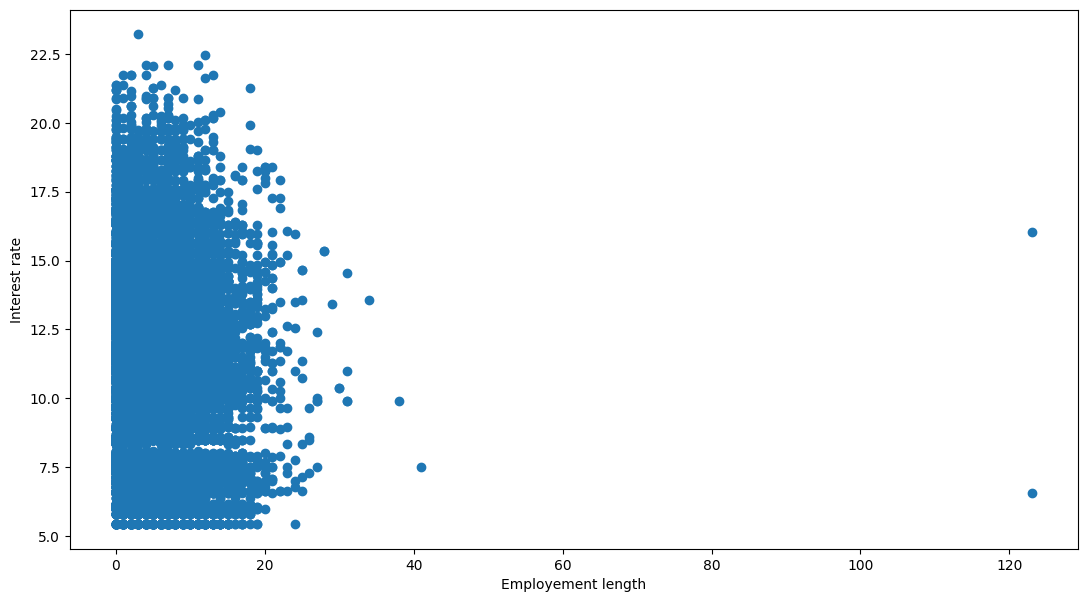

In [19]:
plt.scatter(cr_loan['person_emp_length'], cr_loan['loan_int_rate'])
plt.xlabel('Employement length')
plt.ylabel('Interest rate')

In [20]:
# we can drop all those observations with emp_length > 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

cr_loan.drop(indices, inplace = True)

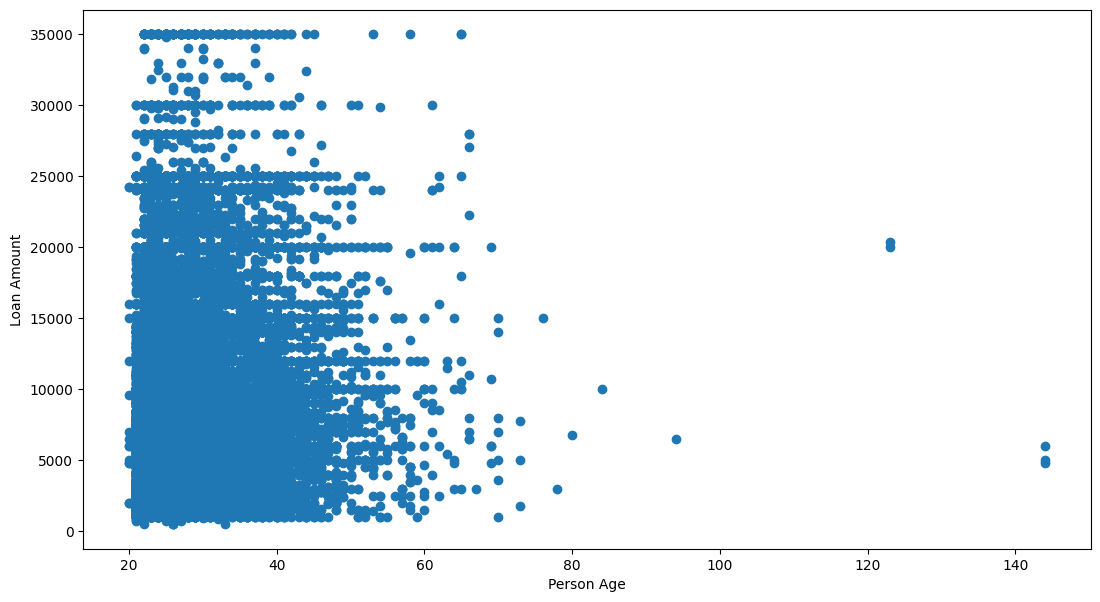

In [21]:
# Let's take a look at other features such as person_age (Common sense will tell us if the data is correct)
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'])
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [22]:
# As we can see there are some outliers, it's very rare for people above 100 years old to ask for a loan

# drop observations with person age greater than 100years
cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index, inplace = True)

In [23]:
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,0,2


## Missing data

Missing data should be treated with care since it can influence the results of our models. 
- loan_status is our target variable and cannot be compromise, any missing rows for this feature should be dropped
- loan amount is another important features so any missing rows should be dropped
- loan interest rate missing values can be replace (For example by the average value of the column)

In [24]:
print(cr_loan.columns[cr_loan.isnull().any()]) #these are the columns with missing values


Index(['person_emp_length', 'loan_int_rate'], dtype='object')


In [25]:
# let's count for the missing observations

missing = cr_loan.columns[cr_loan.isnull().any()]
cr_loan[missing].isnull().sum()

person_emp_length     895
loan_int_rate        3115
dtype: int64

We can definitely impute the missing values of the `person_emp_length` and `loan_int_rate` with the median or the mean of the column.

In [26]:
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)
cr_loan['loan_int_rate'].fillna((cr_loan['loan_int_rate'].mean()), inplace=True)

In [27]:
# check again for missing data
missing = cr_loan.columns[cr_loan.isnull().any()]
cr_loan[missing].isnull().sum()

Series([], dtype: float64)

Now that we have dealed with missing data and outliers we can pass to modelling and creating predictions for the loans. 

## Predictive models

In [28]:
#import libraries and dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

For the first predictive model we're going to use the logistic regression that can be seen as a classification techniques since the predicted values range between 0 and 1. 

### LOGISTIC REGRESSION

#### Simple model

Predictors : interest rate + employment length + person income

In [29]:
# Create training and testing sets

X = cr_loan[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state= 1000)


Let's now check for unbalanced data:

In [30]:
print('Train target data')
ytrain_balance = y_train['loan_status'].value_counts()
print(ytrain_balance)
print('Proportion default/nondefault: ', (ytrain_balance[1]/ytrain_balance[0]), '\n')

print('Test target data')
ytest_balance = y_test['loan_status'].value_counts()
print(ytest_balance)
print('Proportion default/nondefault: ', (ytest_balance[1]/ytest_balance[0]), '\n')

Train target data
loan_status
0    20414
1     5645
Name: count, dtype: int64
Proportion default/nondefault:  0.27652591358871365 

Test target data
loan_status
0    5053
1    1462
Name: count, dtype: int64
Proportion default/nondefault:  0.2893330694636849 



In [31]:
# Multivariate logistic regression

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)


[[ 7.56823859e-02 -1.22061672e-02 -3.55621069e-05]]


In [32]:
# Print all the coefficients and intercept

print('Intercept: ', clf_logistic.intercept_[0])
print('Coefficient for interest rate: ', clf_logistic.coef_[0][0])
print('Coefficient for employement length: ', clf_logistic.coef_[0][1])
print('Coefficient for income: ', clf_logistic.coef_[0][2])

Intercept:  -0.0007259775779752004
Coefficient for interest rate:  0.0756823859348419
Coefficient for employement length:  -0.012206167229621399
Coefficient for income:  -3.556210688309274e-05


What is the interpretation of the coefficients? 
- The intercept is very close to zero and represent hence the log-odds of non default  when all predictors are at 0 or their reference level.
- The coefficient for the interest rate is positive and hence an increase in the ir increase the probability of default
- The coefficient for the interest rate is negative and hence an increase in the employemen length history of the individual decrease its probability of defaulting on a loan
- The coefficient for the interest rate is negative and hence an increase in the income of the individual decrease its probability of defaulting on a loan

But this are log-odds! Ho we can convert back this log odds to probabilities? We can define a function that uses the following formula:

$ p(default) = p(loanstatus = 1) = \frac{1}{1 + e^{-\hat{y}}} = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + ... + \beta_kX_k)}} \ \ \ \text{for k features used}$



In [33]:
# Define a function to convert back values to probabilities

def logodds_to_prob(coefficients, intercept, x_vals):
    
    
    sum_value = intercept
    sum_value += sum(coefficients[i] * x_vals[i] for i in range(len(x_vals)))
    
    prob_default = 1 / (1 + np.exp(-sum_value))
    
    return prob_default
    

In [34]:
# Let's try with rate=12%, emp length = 30 and income of 20000

logodds_to_prob(clf_logistic.coef_[0], clf_logistic.intercept_[0], [12, 30, 20000])

0.45761087019867247

By doing this operation multiple times keeping fixed all the variables and changing one of them we can calculate how the probability of default change for the different levels of the variable that change:

In [35]:
temp = pd.DataFrame(columns = ['Interest rate', 'Employement length', 'Income', 'PD'])

values = [20000, 30000, 40000, 50000, 60000, 70000] #possible values of the income

for i, val in enumerate(values):
    temp.loc[i] = [12, 30, val, logodds_to_prob(clf_logistic.coef_[0], clf_logistic.intercept_[0], [12, 30, val])]

temp


,Interest rate,Employement length,Income,PD
0,12.0,30.0,20000.0,0.457611
1,12.0,30.0,30000.0,0.371547
2,12.0,30.0,40000.0,0.292928
3,12.0,30.0,50000.0,0.224989
4,12.0,30.0,60000.0,0.169040
5,12.0,30.0,70000.0,0.124764


As we can see the greater is the income the smaller becomes the probability of default (in the case of our model). 

Now let's try to extend the previous model and take into account also other predictors.

### Model with numerical and cathegorical variables

Until now we have only used numerical features for the predictive purpose. 
But it would be good to extend our analysis and use also those categorical features that are contained in the dataset. However, before doing so we should apply `one hot encoding` since Python based models can't manage cathecorical features. The main idea of it is to represent a string with a numeric value by adding one column for each level in the domain of the cathecorical features.

In [36]:
# Create two data sets for numeric and non-numeric data
feat_num = cr_loan.select_dtypes(exclude=['object']) # contains numerical features
feat_cat = cr_loan.select_dtypes(include=['object']) # contains categorical features

feat_onehot = pd.get_dummies(feat_cat) # onehot encoding the categorical features

# Joint the one-hot encoded columns to the numeric ones
cr_loan_clean = pd.concat([feat_num, feat_onehot], axis=1)

cr_loan_clean.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
1,21,9600,5.0,1000,11.14,0,0.10,0,2,False,...,False,False,False,False,True,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,0,3,True,...,True,False,False,False,False,True,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,0,2,False,...,True,False,False,False,False,True,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,1,4,False,...,True,False,False,False,False,True,False,False,False,False
5,21,9900,2.0,2500,7.14,1,0.25,0,2,False,...,False,False,True,True,False,False,False,False,False,False


In [37]:
# Create training and testing sets

X = cr_loan_clean.loc[:, cr_loan_clean.columns != 'loan_status']  # all features except the status
y = cr_loan_clean[['loan_status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state= 123)


In [38]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression().fit(X_train, np.ravel(y_train))

# we can use the .predictproba() function to predict the probabilities instead of the function we created before
predictions = clf_logistic.predict_proba(X_test)
# prediction is a 2d array containing (probability of non default, probability of default) for each observation

After getting the predictions, we can store them in a new dataframe. We need to decide a threshold that defines when the predicted observation has defaulted or not. In this case we'll choose 0.5:
- every predicted probability greater than 0.5 will define an observation that has defaulted (that will likely default)
- vicerversa if less than 0.5 will not default

In [39]:
preds_df = pd.DataFrame(predictions[:,1], columns = ['PD'])

# Use a lambda function to assign 1 to default and 0 in the case of not default
preds_df['loan_status'] = preds_df['PD'].apply(lambda x: 1 if x > 0.5 else 0)

preds_df.head()

,PD,loan_status
0,0.292292,0
1,0.168085,0
2,0.220782,0
3,0.570528,1
4,0.001209,0


In [40]:
# Let's measure the accuracy of the predictions

clf_logistic.score(X_test, y_test)

0.8032233307751343

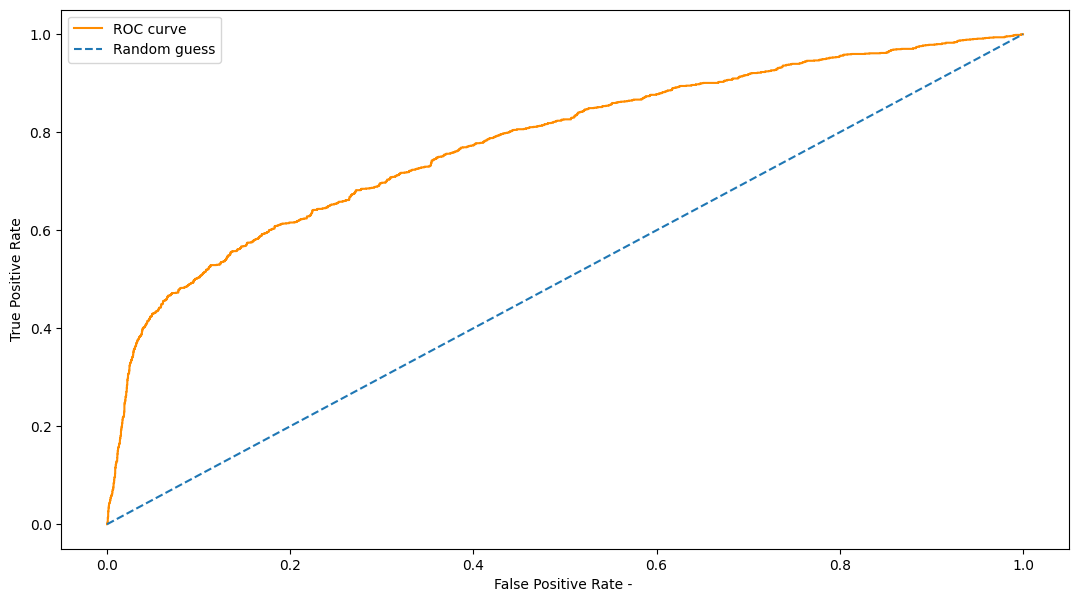

In [41]:
# Let's look at the ROC curve:

from sklearn.metrics import roc_curve

prob_default = predictions[:, 1] #extract the probabilty of defaults from the predictions

fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)

plt.plot(fallout, sensitivity, color = 'darkorange', label = 'ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.legend()
plt.xlabel('False Positive Rate - ')
plt.ylabel('True Positive Rate')
plt.show()

In [42]:
# Area Under Curve score
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, prob_default)
auc

0.7778807299307646

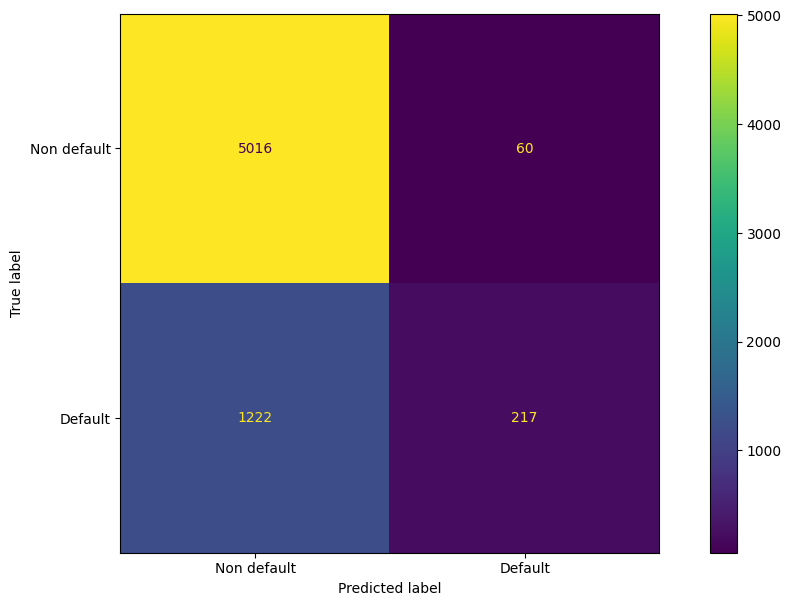

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, preds_df['loan_status']), display_labels = ['Non default', 'Default']).plot()

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds_df['loan_status']))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      5076
           1       0.78      0.15      0.25      1439

    accuracy                           0.80      6515
   macro avg       0.79      0.57      0.57      6515
weighted avg       0.80      0.80      0.75      6515



The original accuracy of the model was 80%, however looking at the recall of default (of 1) it's only 15%! 
Recall of defaults is the proportion of actual positives default correctly predicted. This means that only 15% of the actual defaults were correctly predicted. 
Even if this model has a high accuracy is under performing when trying to predict the defaults (so it's performing well in predicting the non defaults, the 0s).

So ho we can improve the recall of the model? By trying to change the threshold!

In [45]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
compare = pd.DataFrame(columns = ['Model Accuracy','Precision of default', 'Precision of no-default', 'Recall of default', 'Recall of no-default', 'F1-score of default', 'F1-score of no-default'])

for T in thresholds:
        
    df = pd.DataFrame(predictions[:,1], columns = ['PD'])
    df['loan_status'] = df['PD'].apply(lambda x: 1 if x > T else 0)
    
    accuracy = accuracy_score(y_test, df['loan_status'])
    
    scores = precision_recall_fscore_support(y_test, df['loan_status'])
    
    compare.loc[T] = [accuracy, scores[0][1], scores[0][0], scores[1][1], scores[1][0], scores[2][1], scores[2][0]]

    compare.index.name = 'Threshold'

compare


,Model Accuracy,Precision of default,Precision of no-default,Recall of default,Recall of no-default,F1-score of default,F1-score of no-default
Threshold,,,,,,,
0.1,0.421949,0.266693,0.928665,0.924253,0.279551,0.413943,0.429740
0.2,0.599386,0.332571,0.908549,0.808200,0.540189,0.471232,0.677539
0.3,0.743208,0.443750,0.883653,0.641418,0.772065,0.524581,0.824098
0.4,0.831312,0.678197,0.857580,0.449618,0.939519,0.540744,0.896681
0.5,0.803223,0.783394,0.804104,0.150799,0.988180,0.252914,0.886689
0.6,0.784958,0.851852,0.784399,0.031967,0.998424,0.061621,0.878565
0.7,0.779279,0.571429,0.779502,0.002780,0.999409,0.005533,0.875863


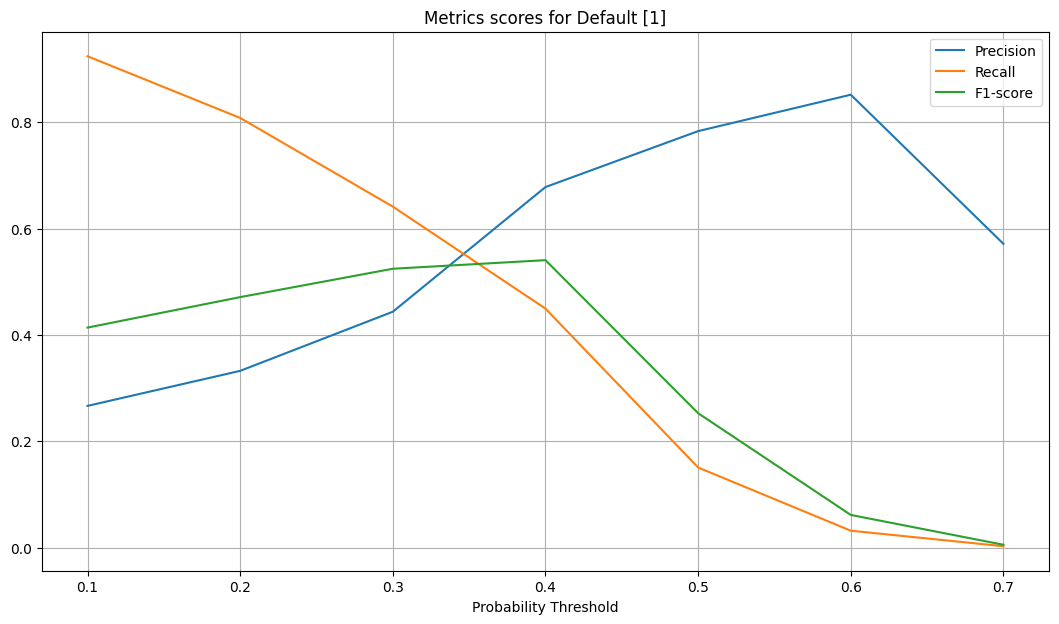

In [46]:
plt.plot(compare['Precision of default'], label = 'Precision' )
plt.plot(compare['Recall of default'], label = 'Recall')
plt.plot(compare['F1-score of default'], label = 'F1-score')
plt.title('Metrics scores for Default [1]')
plt.xlabel('Probability Threshold')
plt.grid()
plt.legend()

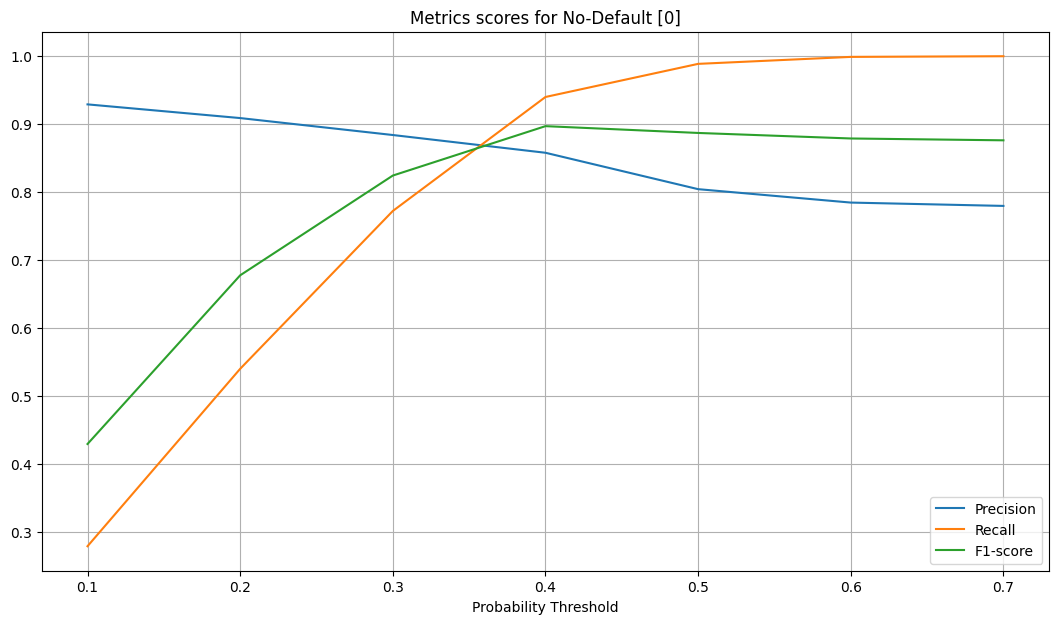

In [47]:
plt.plot(compare['Precision of no-default'], label = 'Precision' )
plt.plot(compare['Recall of no-default'], label = 'Recall')
plt.plot(compare['F1-score of no-default'], label = 'F1-score')
plt.title('Metrics scores for No-Default [0]')
plt.xlabel('Probability Threshold')
plt.grid()
plt.legend()

As we can see, by looking at the first plot, the optimal point (the intersection between the 3 measures related to defaults) is near 0.35

But why we want the model with the a really good recall for defaults?

This comes down to a simple financial interpretation.
- First we need to rememember that the recall formula is $ Recall(1 = default) = \frac{True \ Positives}{True \ Positives + False \ Negatives} $ , so the default recall is the proportion of actual positives defaults correctly predicted. The smaller is the proportion the worse is the ability of the model in predicting correctly the default (the =1 value of our target variable).
- Second, let's take the perspective of a financial firm. If we were a bank and need to estimate the amount of unexpected loss for a given amount of loans, we would certainly use the default recall to find out the possible proportion of defaults that wouldn't be catched by the predictions. This amount would tell how much in losses the bank would have to face if all the unfound (uncorrectly predicted) defaults were to default all at once. 
- So we can conclude that for a bank is really important to predict all the possible defaults, otherwise the unexpected loss can potentially be really large. 


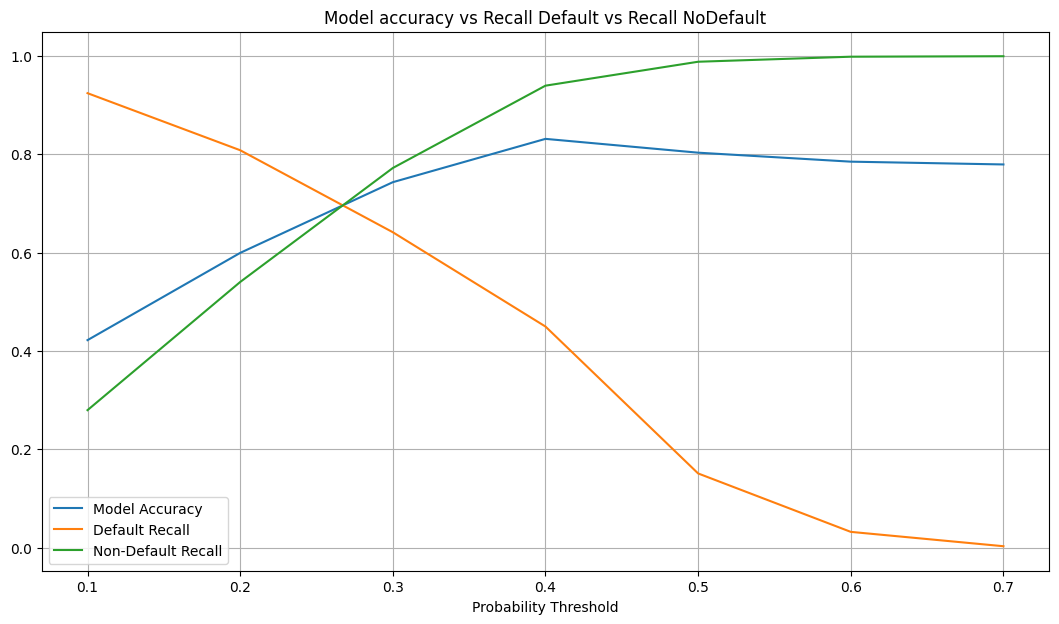

In [48]:
# Let's now compare Model accuracy vs Recall Default vs Recall NoDefault

plt.plot(compare['Model Accuracy'], label = 'Model Accuracy' )
plt.plot(compare['Recall of default'], label = 'Default Recall')
plt.plot(compare['Recall of no-default'], label = 'Non-Default Recall')
plt.xlabel("Probability Threshold")
plt.title('Model accuracy vs Recall Default vs Recall NoDefault')
plt.grid()
plt.legend()
plt.show()


Now let's try the two handpicked thresholds 0.27 from the last graph, and 0.35 from the 'Metrics scores for Default [1]' graph, and look at the results in term of confusion matrix. 

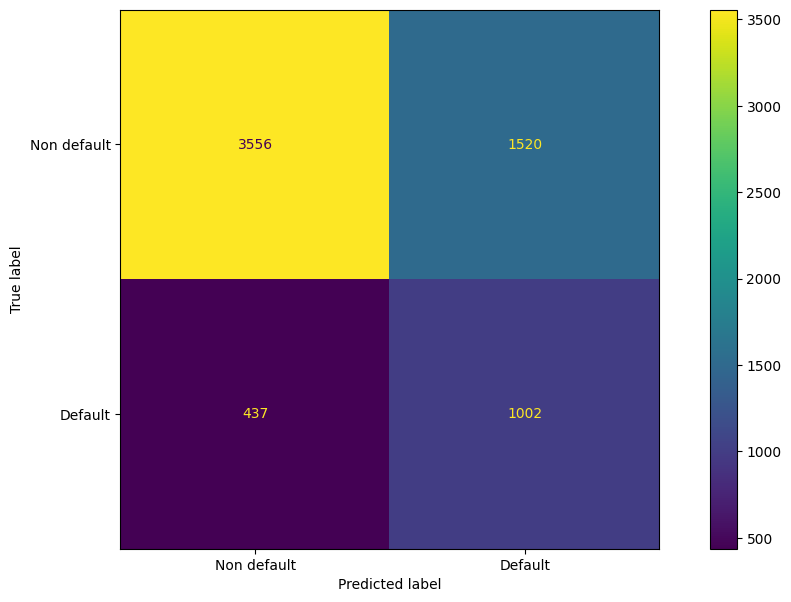

In [49]:
# 0.27 threshold

T = 0.27

# we need to consider again the probality predictions that we got from: clf_logistic.predict_proba(X_test)
df = pd.DataFrame(predictions[:,1], columns = ['PD'])

# calculate again the predictions of default/non default using the threshold 0.27
df['loan_status'] = df['PD'].apply(lambda x: 1 if x > T  else 0)

# let's look again at the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, df['loan_status']), display_labels = ['Non default', 'Default']).plot()

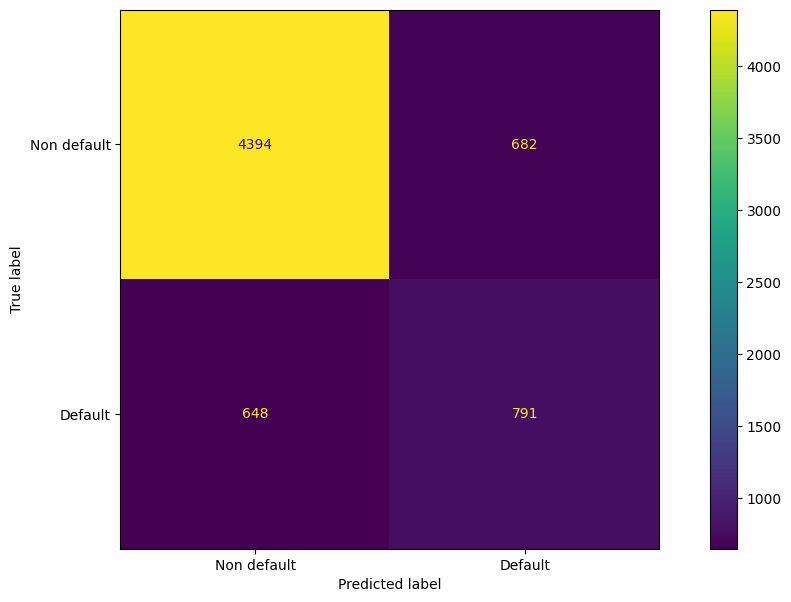

In [50]:
# 0.35 threshold

T = 0.35

# we need to consider again the probality predictions that we got from: clf_logistic.predict_proba(X_test)
df = pd.DataFrame(predictions[:,1], columns = ['PD'])

# calculate again the predictions of default/non default using the threshold 0.35
df['loan_status'] = df['PD'].apply(lambda x: 1 if x > T  else 0)

# let's look again at the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, df['loan_status']), display_labels = ['Non default', 'Default']).plot()

It looks like the two models using this thresholds are better at the predicting the TRUE POSITIVES (the TRUE DEFAULTS in which we are intersted in), however there are still large errors. 

This thresholds were useful in enhancing the RECALL PERFORMANCE FOR default, at the price of increasing the number of FALSE POSITIVES. 